In [5]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as plt
%matplotlib inline
import torchvision.utils as vutils
import glob
import tensorflow as tf
import matplotlib.gridspec as gridspec

In [1]:
import sys
sys.path.append('../')
import models
import models.mnist
from data import get_loaders
from main import DictWrapper

In [2]:
%load_ext autoreload
%autoreload 1

In [3]:
%aimport log_plotter
from log_plotter import get_run_names, get_data, get_data_pth, plot_smooth, plot_tag, plot_runs_and_tags, get_legend

In [135]:
def plot_memory(data, fig_name):
    x, y, mask, annt, tot = data

    height = 20
    width = 1
    pad = 4
    
    fig = plt.figure(figsize=(20*width, height))
    # fig.subplots(height, width)
    # fig = plt.figure(1)
    gridspec.GridSpec(height+1, width)
    for i in range(height):
        xi = x[i, mask[i]].view((mask[i].sum(), 1, 28, 28))
        xi2 = torch.zeros((xi.shape[0], 3, 28+2*pad, 28+2*pad), dtype=xi.dtype)
        xi2[:, 0] = annt[i][mask[i]].type(dtype=xi.dtype).unsqueeze(1).unsqueeze(2)
        xi2[:, 0:1, pad:28+pad, pad:28+pad] = xi
        xi2[:, 1:2, pad:28+pad, pad:28+pad] = xi
        xi2[:, 2:3, pad:28+pad, pad:28+pad] = xi
        xi = vutils.make_grid(xi2, nrow=mask.sum(1).max().item(), normalize=True, scale_each=True)
        # plt.subplot(height, width, i+1)
        ax1 = plt.subplot2grid((height+1, width), (i,0))
        plt.imshow(xi.numpy().transpose([1,2,0]))
        # ax1.set_ylabel('foo', visible=True)
        plt.axis('off')
        # y_axis = ax1.axes.get_yaxis()
        # y_axis.set_label_text('foo')
        # y_axis.set_visible(True)
        # y_label = y_axis.get_label()
        # y_label.set_visible(True)
        plt.title('%s' % list(tot[i, mask[i]].numpy()))
    plt.subplot2grid((height+1, width), (height,0))
    plt.title('%s' % list(mask.sum(1).numpy()))
    plt.axis('off', fontsize=12)
    fig.tight_layout()
    # fig.set_size_inches(w=4*width,h=4*height)
    plt.savefig(fig_name, dpi=100, bbox_inches='tight')

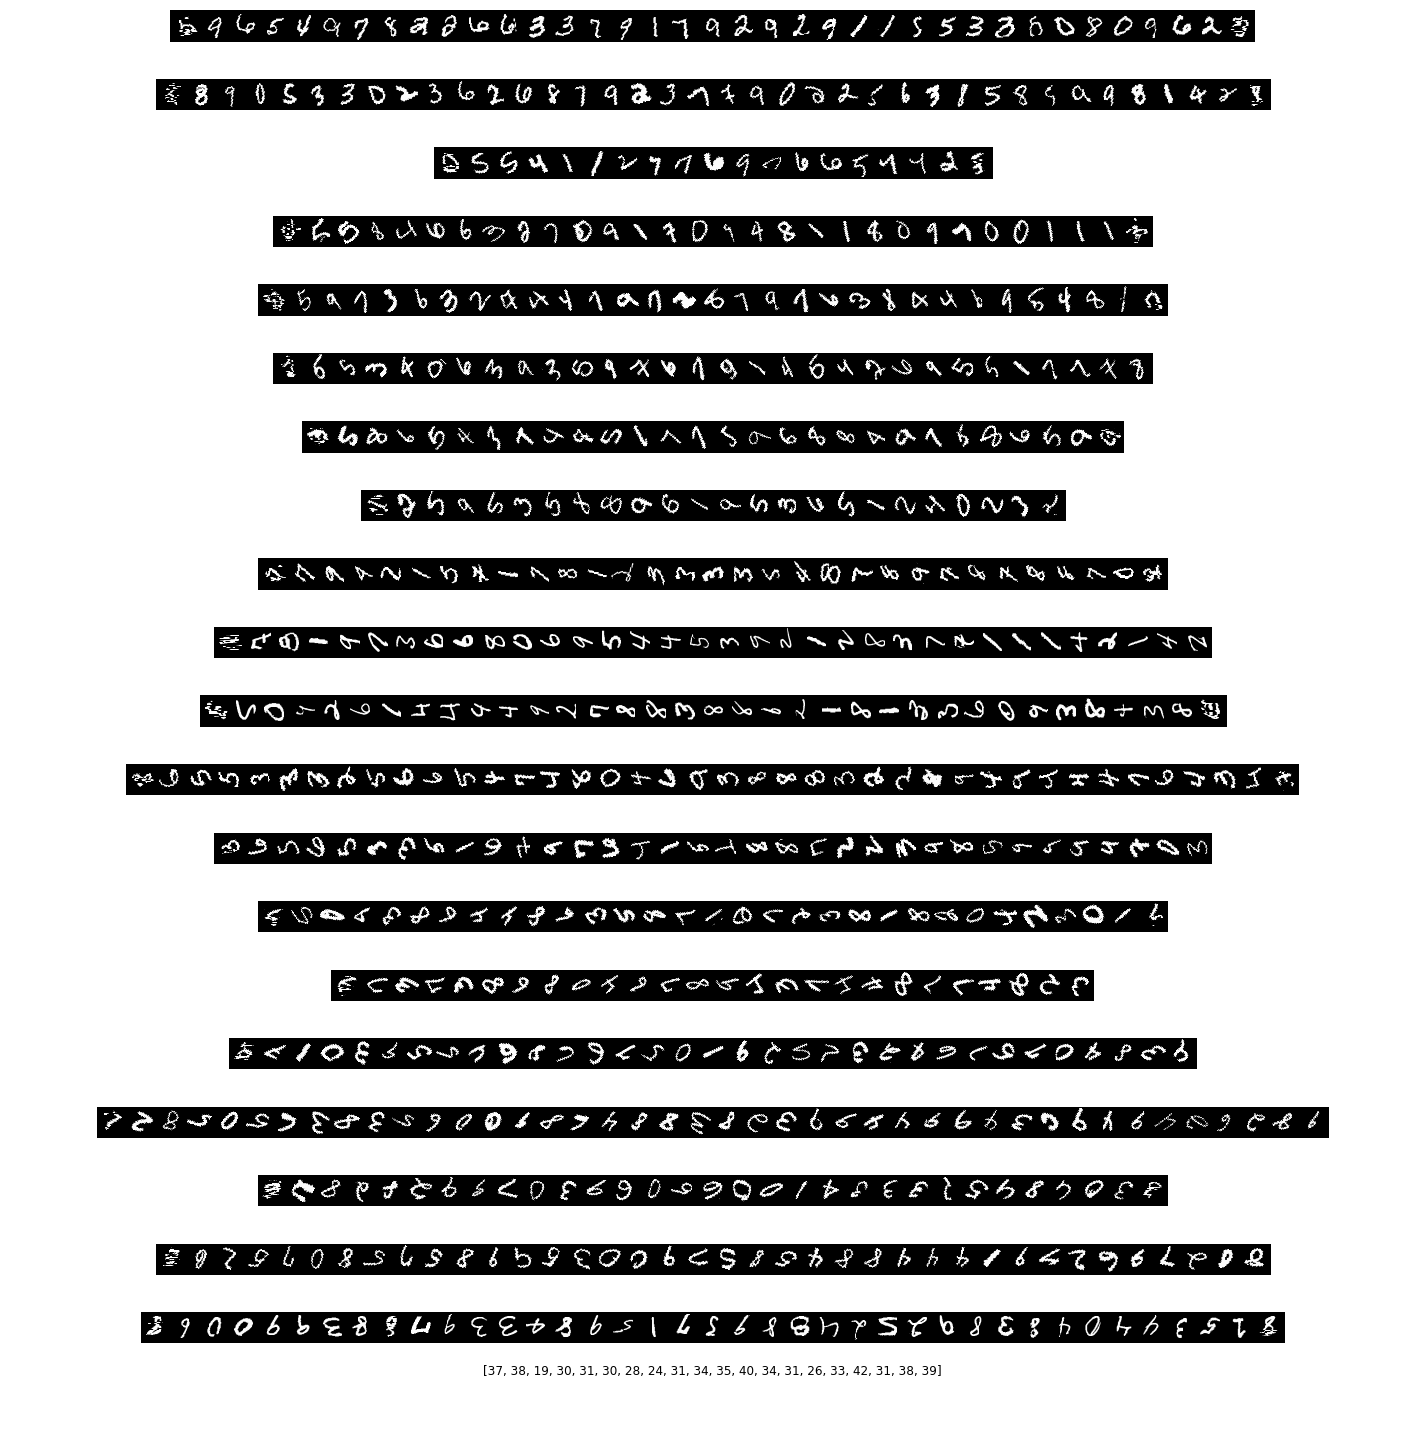

In [91]:
data=torch.load('figs_gem/gemh_mnist_rotations.pt_2018_09_17_14_52_54_0073e4546ff54a699884df3ab104800b_mem.pt')
plot_memory(data, 'figs_gem/lsh.png')

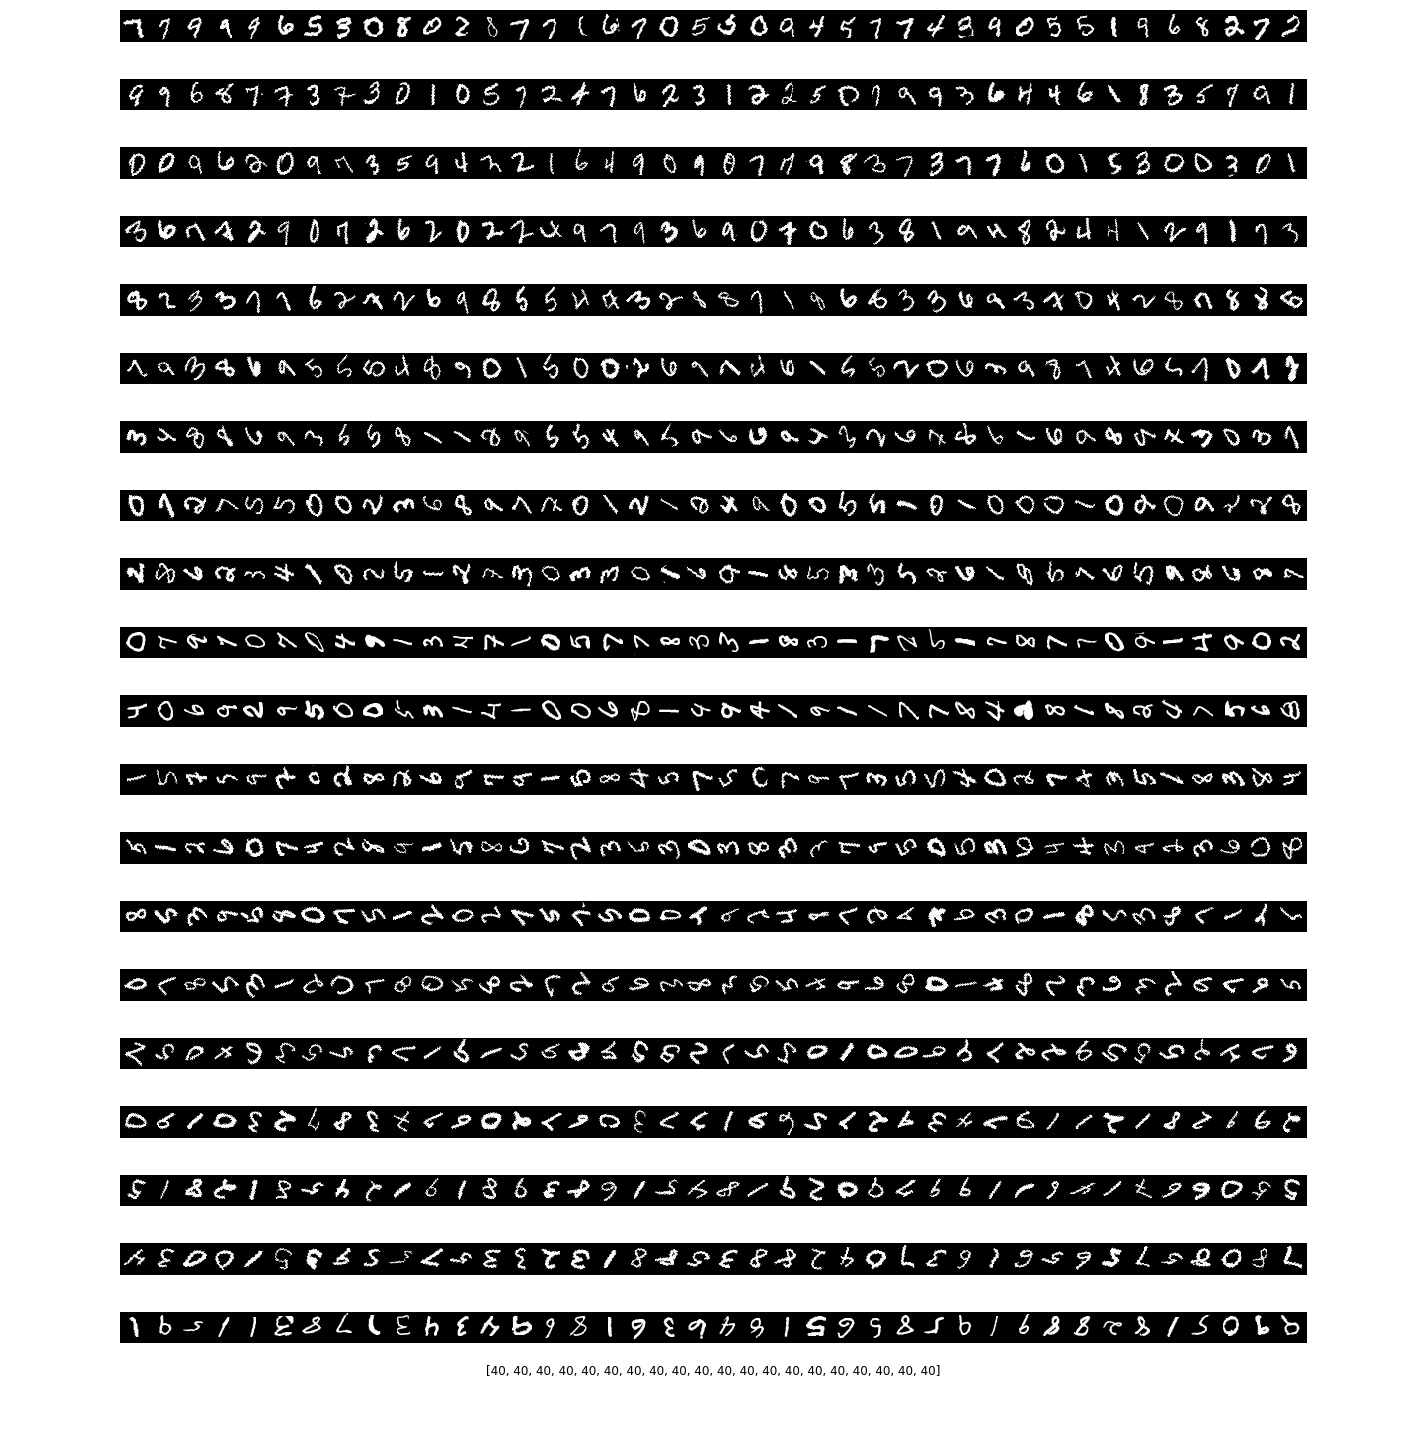

In [92]:
data=torch.load('figs_gem/gemh_mnist_rotations.pt_2018_09_17_16_28_48_6f74a5d463894b9a8a0d2083b5a96238_mem.pt')
plot_memory(data, 'figs_gem/uniform.png')

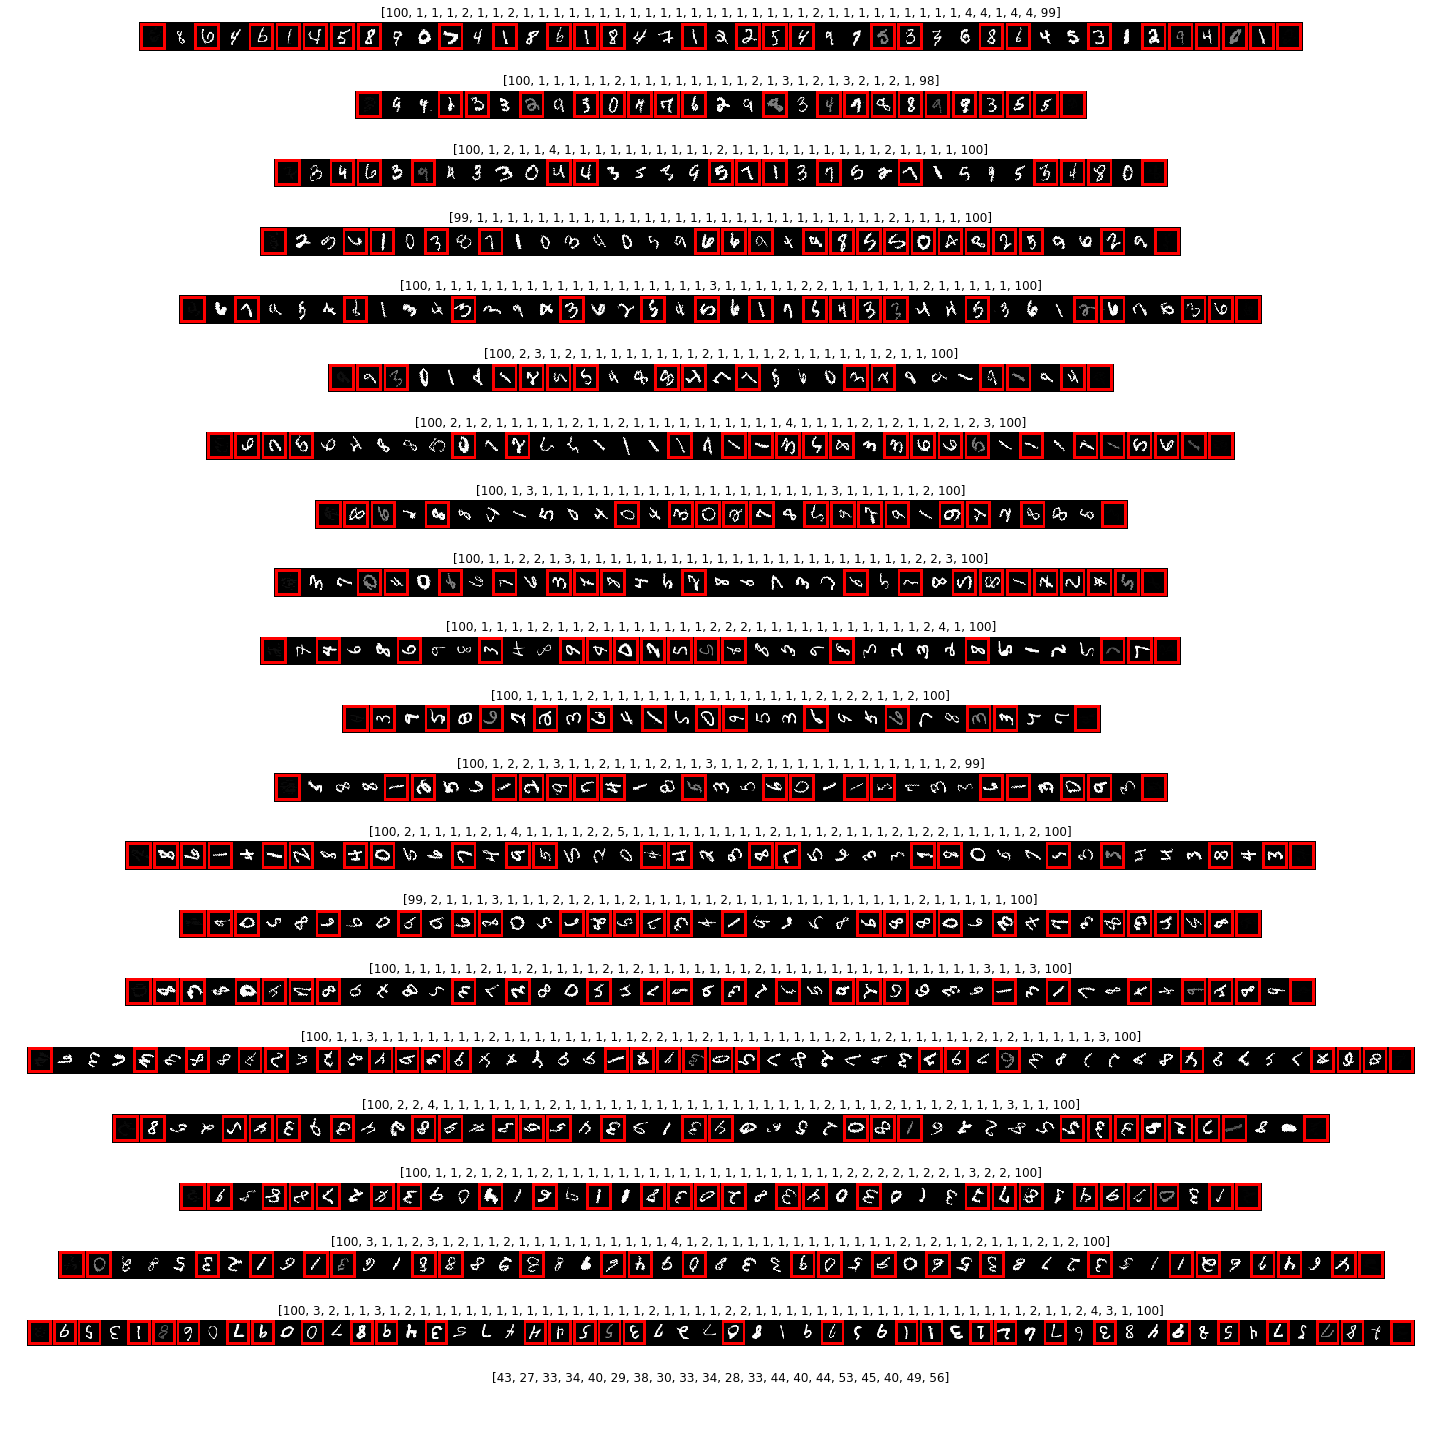

In [139]:
data=torch.load('figs_gem/gemh_mnist_rotations.pt_2018_09_20_11_25_34_57dd2c5aba5f496d957cb6e6b8b632ae_mem.pt')
plot_memory(data, 'figs_gem/corrupt_lsh.png')

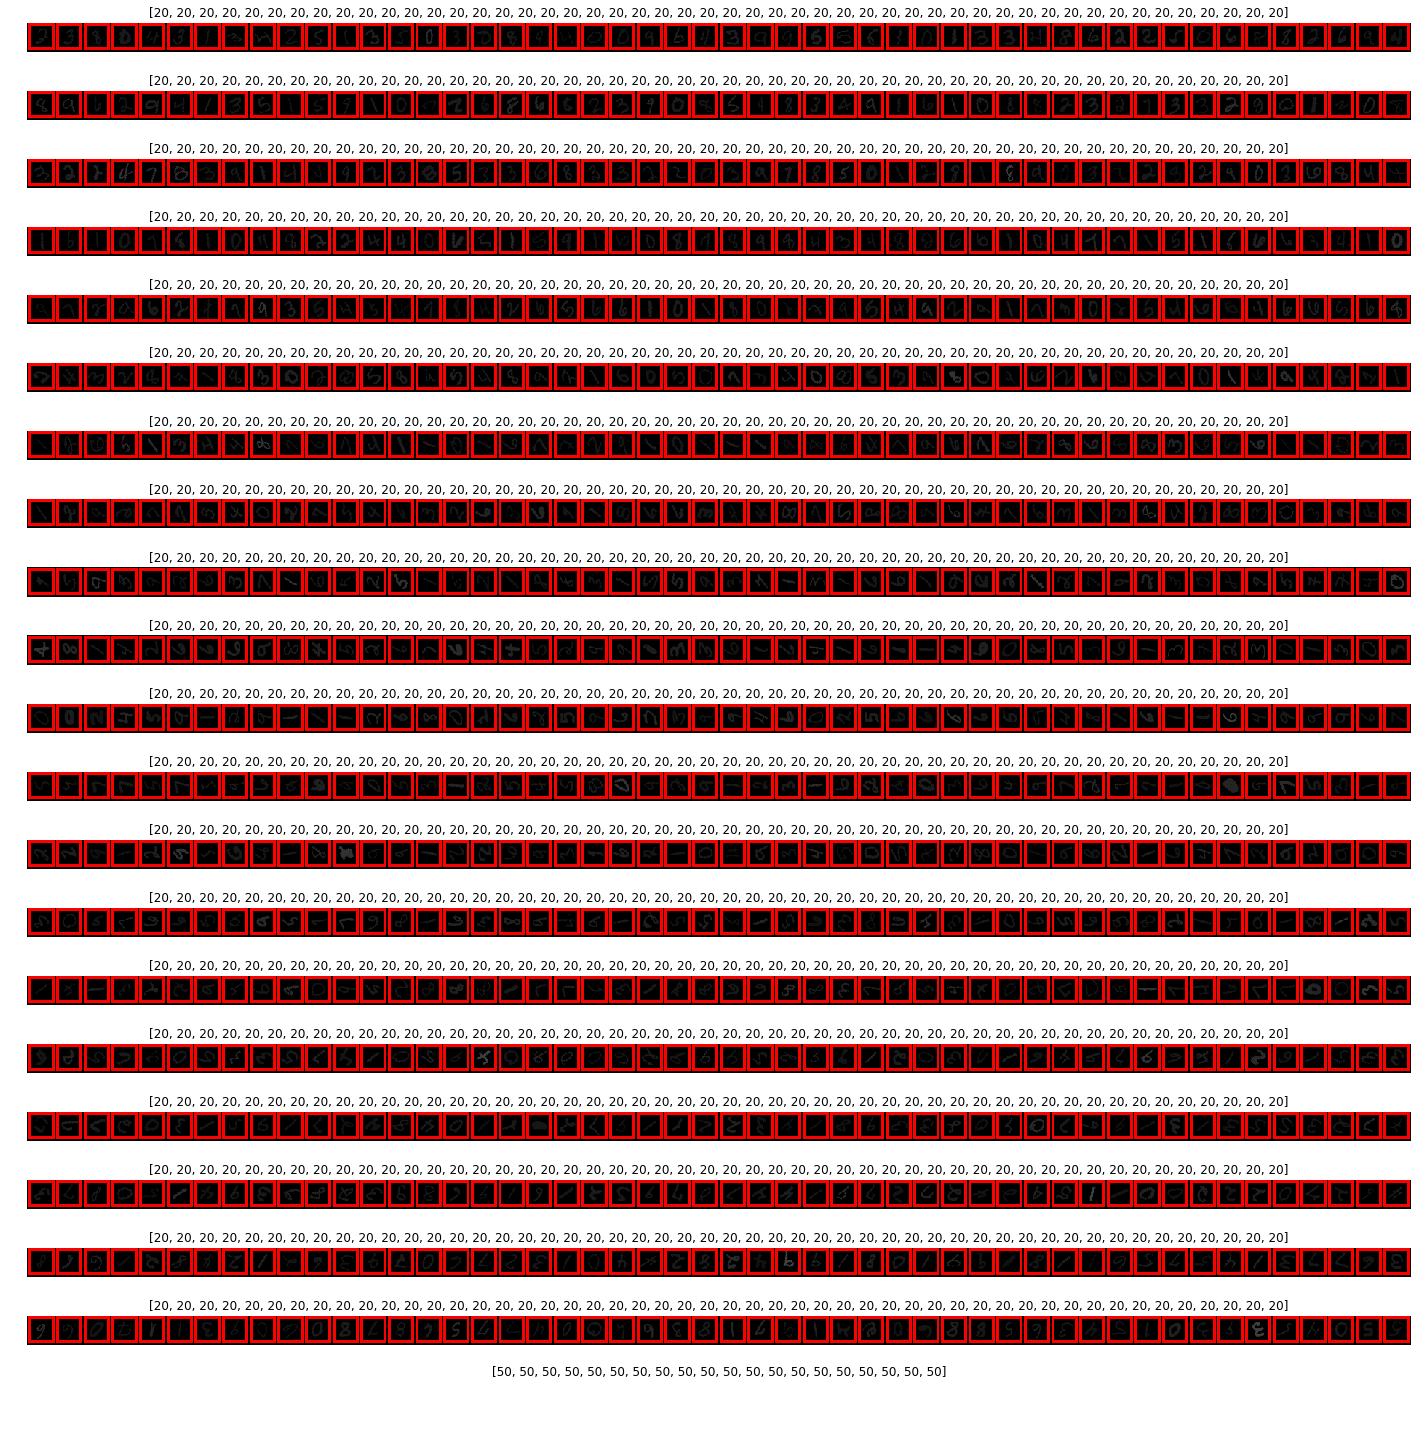

In [138]:
data=torch.load('figs_gem/gemh_mnist_rotations.pt_2018_09_20_11_21_13_a270d0d7c7d64bf68d273445ee9ba709_mem.pt')
plot_memory(data, 'figs_gem/corrupt_uniform.png')